In [ ]:
import torch
import numpy as np
import csv
import matplotlib as plt

: 

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('nettcr_data.csv') 

# Get unique entries from a specific column
unique_values = df['peptide'].unique()

# Convert to a list (optional)
unique_list = unique_values.tolist()

print(unique_list)


['SPRWYFYYL', 'GILGFVFTL', 'KLGGALQAK', 'CINGVCWTV', 'RAKFKQLL', 'AVFDRKSDAK', 'RFPLTFGWCF', 'KSKRTPMGF', 'ELAGIGILTV', 'NLVPMVATV', 'ATDALMTGF', 'GLCTLVAML', 'SLFNTVATLY', 'LLWNGPMAV', 'DATYQRTRALVR', 'IVTDFSVIK', 'FEDLRLLSF', 'HPVTKYIM', 'GPRLGVRAT', 'VLFGLGFAI', 'YLQPRTFLL', 'FEDLRVLSF', 'RLPGVLPRA', 'RLRAEAQVK', 'RPPIFIRRL', 'CTELKLSDY']


In [9]:
blosum_data = torch.load('blosum50.pt', weights_only=False)

In [4]:
thingy = iter(blosum_data.items())
padding_lengths = []
for i in range(0,7):
    key, value = next(thingy)
    print(key)
    padding_lengths.append(value[i].shape[1])

padding_lengths    

SPRWYFYYL_KALYS_LLKGGEQ_GTEIGGGTSYGKLT_MNHEY_SMNVEV_ASGTETQY
GILGFVFTL_DRGSQS_IYSNGD_AVNPANARLM_DFQATT_SNEGSKA_SARWGGGTDTQY
KLGGALQAK_TSGFNG_NVLDGL_AVGDDKII_DFQATT_SNEGSKA_SARGLDRGTNEQY
KLGGALQAK_DRGSQS_IYSNGD_AVTPGTYKYI_LGHDT_YNNKEL_ASSPGTSIFVAEQY
CINGVCWTV_TRDTTYY_RNSFDEQN_AFLYNQGGKLI_SGHDY_FNNNVP_ASSPGSRGNIQY
RAKFKQLL_DRGSQS_IYSNGD_APNSGGGADGLT_LGHNT_FRNRAP_ASGKLAGVLSEQF
AVFDRKSDAK_DRGSQS_IYSNGD_ASPGGGADGLT_SGHDT_YYEEEE_ASSATGTHSFGYT


[12, 7, 8, 22, 6, 7, 23]

In [5]:
def pad_sequence(
    sequence: np.ndarray,
    padding_length: int,
    padding_value=-5.0,
    padding_side="right",
) -> np.ndarray:
    """Pad a single sequence to the specified length.

    Args:
        sequence: A numpy array representing the sequence to pad.
        padding_length: An integer representing the length to pad the sequence to.
        padding_value: The value to use for padding.
        padding_side: A string specifying the side to pad on: 'left', 'right', or 'center'.

    Returns:
        A numpy array representing the padded sequence.
    """
    if padding_length <= sequence.shape[0]:
        return sequence

    pad_size = padding_length - sequence.shape[0]

    if padding_side == "left":
        pad_width = ((pad_size, 0), (0, 0))
    elif padding_side == "right":
        pad_width = ((0, pad_size), (0, 0))
    elif padding_side == "center":
        if pad_size % 2 != 0:
            raise ValueError(
                "For center padding, the padding length must result in equal padding on both sides."
            )
        pad_left = pad_size // 2
        pad_right = pad_size // 2
        pad_width = ((pad_left, pad_right), (0, 0))
    else:
        raise ValueError(
            "Invalid padding_side. Choose from 'left', 'right', or 'center'."
        )

    return np.pad(
        sequence,
        pad_width,
        mode="constant",
        constant_values=padding_value,
    )

In [6]:
tcr_padded_data = {}
for key, value in tcr_data.items():
    l = []
    l.append(value[0])
    for i in range(1,7):
        l.append(np.array(value[i].T))
    tcr_padded_data[key] = l
        
torch.save(tcr_padded_data, "tcr_padded_data.pt")

NameError: name 'tcr_data' is not defined

In [ ]:
def process_sequence(args):
    padding_value = -5.0
    (
        seqs,
        encoding_scheme,
        padding_lengths,
        out_path,
        peptide_esm_dir,
        cdr_esm_dir,
        save_to_dict,
    ) = args

    if encoding_scheme == "esm":
        # data = get_esm_embeddings(seqs, peptide_esm_dir, cdr_esm_dir)
        pass
    else:
        data = [
            (
                encode_sequence(seq, encoding_scheme)
                if seq
                else np.array([np.repeat(padding_value, 20)], dtype=np.int8)
            )
            for seq in seqs
        ]
    data = [
        pad_sequence(seq, length, padding_value).T
        for seq, length in zip(data, padding_lengths)
    ]

    # Convert to numpy instead of torch tensors before returning
    data = [
        np.array(seq, dtype=np.float32) for seq in data
    ]  # Avoid huge tensors in memory

    if save_to_dict:
        return out_path.stem, data  # Return numpy instead of tensor
    else:
        torch.save(data, str(out_path))
        return None

In [ ]:
for i in range(7):
    print(value[i].shape) 
value = [np.array(pad_sequence(seq.T, length, -5).T) for seq, length in  zip(value, padding_lengths)]
for i in range(7):
    print(value[i].shape) 

(20, 12)
(480, 5)
(480, 7)
(480, 14)
(480, 5)
(480, 6)
(480, 8)
(20, 12)
(480, 7)
(480, 8)
(480, 22)
(480, 6)
(480, 7)
(480, 23)


In [ ]:
tcrt_data = torch.load('tcr_transposed_data.pt', weights_only=False)
tcr_pad_data = {}
for key, value in tcrt_data.items():
    v = [np.array(pad_sequence(seq.T, length, -5).T) for seq, length in  zip(value, padding_lengths)]
    tcr_pad_data[key] = v


In [8]:
key1, value1 = next(iter(tcr_pad_data.items()))
key2, value2 = next(iter(blosum_data.items()))
print(key1 == key2)
for i in range(7):
    print(value1[i].shape)
    print(value2[i].shape)

NameError: name 'tcr_pad_data' is not defined

In [ ]:
iter1 = iter(blosum_data.items())
iter2 = iter(tcr_pad_data.items())
for i in range(len(blosum_data)):
    k1,v1 = next(iter1)
    k2,v2 = next(iter2)
    if (k1 == k2 and v1[3].shape[1] == v2[3].shape[1]):
        pass
    else:
        print('big no')

In [ ]:
torch.cuda.empty_cache() 

In [ ]:
torch.save(tcr_pad_data,'tcrlang_padded_data.pt', pickle_protocol=4)

In [ ]:
print(next(iter(tcr_pad_data.items()))[1])

NameError: name 'tcr_pad_data' is not defined

In [4]:
data = torch.load('tcrlang_padded_data.pt', weights_only=False)

In [40]:
value = torch.from_numpy(next(iter(data.values()))[1]).unsqueeze(0).repeat(64, 1, 1)
normed = torch.nn.functional.normalize(value, p=2, dim=1)
normed_t = torch.stack([x.T for x in normed])
print(normed.shape,normed_t.shape)
print(len(normed_t[1][5]))
print(sum(x**2 for x in normed_t[1][5]))

torch.Size([64, 480, 7]) torch.Size([64, 7, 480])
480
tensor(1.0000)


In [37]:
vector = next(iter(data.values()))[5] #tcr encoding
print(vector.shape)
for i in vector.T:
    print(max(i),min(i))


(480, 7)
0.8703468 -1.239718
0.96544063 -1.2190589
0.8740583 -1.0445005
0.825287 -1.070557
0.92683095 -1.0948275
0.8430029 -1.0165862
-5.0 -5.0


In [44]:
model = torch.load('model_experiment_1_0.pt', map_location=torch.device("cpu"), weights_only=False)
model.eval()

CNN_CDR123_global_max_normalization(
  (pep_conv_layers): ModuleList(
    (0): Sequential(
      (0): Conv1d(20, 16, kernel_size=(1,), stride=(1,), padding=same, bias=False)
      (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): AdaptiveMaxPool1d(output_size=1)
    )
    (1): Sequential(
      (0): Conv1d(20, 16, kernel_size=(3,), stride=(1,), padding=same, bias=False)
      (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): AdaptiveMaxPool1d(output_size=1)
    )
    (2): Sequential(
      (0): Conv1d(20, 16, kernel_size=(5,), stride=(1,), padding=same, bias=False)
      (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): AdaptiveMaxPool1d(output_size=1)
    )
    (3): Sequential(
      (0): Conv1d(20, 16, kernel_size=(7,), stride=(1,), padding=same, bias=False)
      (1): BatchNorm1d(16, eps=1e-05,

In [59]:
# Access the first Conv1d layer inside the first Sequential block
#conv_weight = model.a1_conv_layers[0][0].weight  # [0] = Conv1d layer pep_conv_layers
conv_weight = model.pep_conv_layers[3][0].weight
print("Conv1d weight shape:", conv_weight.shape)
print("Conv1d weights:\n", conv_weight.data)
conv_weight.data.abs().std()


Conv1d weight shape: torch.Size([16, 20, 7])
Conv1d weights:
 tensor([[[ 0.5180, -0.0349, -0.1883,  ..., -0.0485, -0.2565, -0.2170],
         [-0.0324,  0.2046, -0.1877,  ...,  0.2063, -0.1720, -0.2937],
         [-0.2086,  0.1861,  0.0046,  ...,  0.2543, -0.1514, -0.1332],
         ...,
         [-0.3361, -0.0117,  0.0231,  ...,  0.1552,  0.0408, -0.0762],
         [-0.3047, -0.2364,  0.3487,  ..., -0.1364, -0.1264, -0.2979],
         [-0.0901, -0.5594, -0.0950,  ..., -0.0725, -0.2345,  0.2289]],

        [[ 1.3569, -0.3404,  0.1595,  ..., -0.0463, -0.0648,  0.0597],
         [-0.0622, -0.2041, -0.4474,  ...,  0.1942, -0.1377, -0.1677],
         [-0.1180,  0.2231,  0.3989,  ...,  0.2400,  0.0456, -0.0812],
         ...,
         [-0.1034, -0.5291, -0.0854,  ...,  0.0690, -0.0490, -0.1128],
         [-0.2828, -0.4750, -0.5300,  ..., -0.0659,  0.0267, -0.1234],
         [ 0.2816, -0.1200,  0.0870,  ..., -0.0314, -0.0036,  0.1840]],

        [[ 1.1326,  0.3015,  0.2508,  ...,  0.1565, -0

tensor(0.1843)

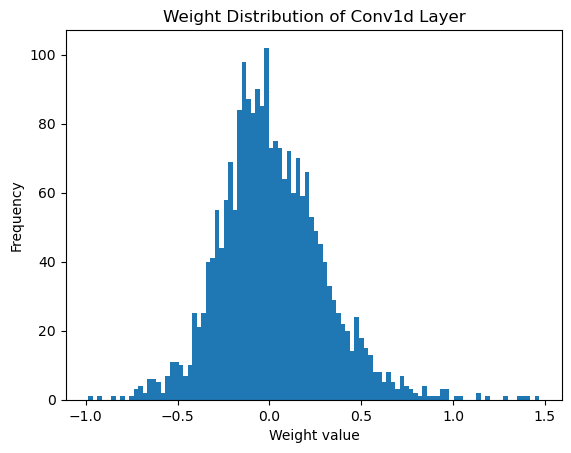

In [60]:
plt.hist(conv_weight.data.cpu().flatten().numpy(), bins=100)
plt.title("Weight Distribution of Conv1d Layer")
plt.xlabel("Weight value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        data = param.data.cpu().flatten().numpy()
        plt.hist(data, bins=100)
        plt.title(f"Weight Histogram: {name}")
        plt.xlabel("Weight value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
